# IMPORTING LIBRARIES

In [2]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

print("Libraries loaded.")

Libraries loaded.


# LOADING DATASET

In [5]:
gen= pd.read_csv('/Users/oluwatofunmifak-adeniyi/Downloads/Genetic_disorder.csv')

In [7]:
display(gen.head())
display(gen.info())

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
1,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,PID0x7678,6.0,Yes,No,Yes,No,4.620420,Ruth,Homza,Cesareo,...,Multiple,3.000000,slightly abnormal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,PID0x952d,10.0,Yes,Yes,Yes,No,4.751452,James,Whipple,Dvon,...,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
4,PID0x6d89,6.0,No,Yes,Yes,Yes,4.876896,Miguel,Canada,Zykevious,...,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        5585 non-null   object 
 1   Patient Age                                       5585 non-null   float64
 2   Genes in mother's side                            5585 non-null   object 
 3   Inherited from father                             5585 non-null   object 
 4   Maternal gene                                     5585 non-null   object 
 5   Paternal gene                                     5585 non-null   object 
 6   Blood cell count (mcL)                            5585 non-null   float64
 7   Patient First Name                                5585 non-null   object 
 8   Family Name                                       5585 non-null   object 
 9   Father's name      

None

In [9]:
gen.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,5585.000000,5585.000000,5585.000000,5585.000000,5585.0,5585.0,5585.0,5585.0,5585.0,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000,5585.000000
mean,6.916562,4.901093,34.711549,41.989794,0.0,0.0,0.0,1.0,0.0,2.004476,7.413868,0.586750,0.551477,0.543599,0.496509,0.469651
std,4.354565,0.199098,9.826889,12.968833,0.0,0.0,0.0,0.0,0.0,1.409831,2.648672,0.492461,0.497388,0.498140,0.500033,0.499123
min,0.000000,4.146230,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.768235,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.362171,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899601,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.356993,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.036165,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.449252,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
gen.describe(include='object')

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585,...,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585
unique,5585,2,2,2,2,1348,3463,5166,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x8ce3,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,...,Yes,No,No,-,Yes,Yes,Singular,normal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,3351,3355,3135,3159,113,74,3,2796,2796,...,2835,2849,1443,1433,2852,2847,2804,1452,2867,1428


In [13]:
## Checking for missing values

print(gen.isnull().sum())

Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Patient First Name                                  0
Family Name                                         0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Institute Name                                      0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                      

In [15]:
## Checking for duplicates

gen.duplicated().sum()

0

In [17]:
## Showing unique counts for key columns 
unique_counts = gen.nunique().sort_values(ascending=False)
display(unique_counts)


Patient Id                                          5585
Blood cell count (mcL)                              5585
Father's name                                       5166
White Blood cell count (thousand per microliter)    4856
Family Name                                         3463
Patient First Name                                  1348
Father's age                                          45
Mother's age                                          34
Institute Name                                        27
Location of Institute                                 26
Patient Age                                           15
Disorder Subclass                                      9
No. of previous abortion                               5
H/O substance abuse                                    4
Birth asphyxia                                         4
Blood test result                                      4
H/O radiation exposure (x-ray)                         4
Genetic Disorder               

In [19]:
## Dropping irrelevant columns
irrelevant_columns = [
    'Patient Id',
    'Patient First Name',
    'Family Name',
    "Father's name",
    'Institute Name',
    'Location of Institute',
    "Mother's age",
    "Father's age",
    'Autopsy shows birth defect (if applicable)'
]

gen = gen.drop(columns=irrelevant_columns)

print("Remaining columns:\n")
print(gen.columns.tolist())

Remaining columns:

['Patient Age', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects', 'White Blood cell count (thousand per microliter)', 'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Genetic Disorder', 'Disorder Subclass']


In [21]:
## Replacing spaces with underscores in column names
gen.columns = gen.columns.str.replace(' ', '_')

print("Updated column names:\n")
print(gen.columns.tolist())

Updated column names:

['Patient_Age', "Genes_in_mother's_side", 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 'Blood_cell_count_(mcL)', 'Status', 'Respiratory_Rate_(breaths/min)', 'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow-up', 'Gender', 'Birth_asphyxia', 'Place_of_birth', 'Folic_acid_details_(peri-conceptional)', 'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)', 'H/O_substance_abuse', 'Assisted_conception_IVF/ART', 'History_of_anomalies_in_previous_pregnancies', 'No._of_previous_abortion', 'Birth_defects', 'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass']


In [23]:
## Replacing "H/O" with "HO" in column names
gen.columns = gen.columns.str.replace("H/O", "HO", regex=False)

print("Updated column names:\n")
print(gen.columns.tolist())

Updated column names:

['Patient_Age', "Genes_in_mother's_side", 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 'Blood_cell_count_(mcL)', 'Status', 'Respiratory_Rate_(breaths/min)', 'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow-up', 'Gender', 'Birth_asphyxia', 'Place_of_birth', 'Folic_acid_details_(peri-conceptional)', 'HO_serious_maternal_illness', 'HO_radiation_exposure_(x-ray)', 'HO_substance_abuse', 'Assisted_conception_IVF/ART', 'History_of_anomalies_in_previous_pregnancies', 'No._of_previous_abortion', 'Birth_defects', 'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass']


In [25]:
## Replacing "Follow-up" with "Follow_up" in column names
gen.columns = gen.columns.str.replace("Follow-up", "Follow_up", regex=False)

print("Updated column names:\n")
print(gen.columns.tolist())

Updated column names:

['Patient_Age', "Genes_in_mother's_side", 'Inherited_from_father', 'Maternal_gene', 'Paternal_gene', 'Blood_cell_count_(mcL)', 'Status', 'Respiratory_Rate_(breaths/min)', 'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia', 'Place_of_birth', 'Folic_acid_details_(peri-conceptional)', 'HO_serious_maternal_illness', 'HO_radiation_exposure_(x-ray)', 'HO_substance_abuse', 'Assisted_conception_IVF/ART', 'History_of_anomalies_in_previous_pregnancies', 'No._of_previous_abortion', 'Birth_defects', 'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass']


In [27]:
## Showing updated column names
for column in gen.columns:
    print(column)

Patient_Age
Genes_in_mother's_side
Inherited_from_father
Maternal_gene
Paternal_gene
Blood_cell_count_(mcL)
Status
Respiratory_Rate_(breaths/min)
Heart_Rate_(rates/min
Test_1
Test_2
Test_3
Test_4
Test_5
Parental_consent
Follow_up
Gender
Birth_asphyxia
Place_of_birth
Folic_acid_details_(peri-conceptional)
HO_serious_maternal_illness
HO_radiation_exposure_(x-ray)
HO_substance_abuse
Assisted_conception_IVF/ART
History_of_anomalies_in_previous_pregnancies
No._of_previous_abortion
Birth_defects
White_Blood_cell_count_(thousand_per_microliter)
Blood_test_result
Symptom_1
Symptom_2
Symptom_3
Symptom_4
Symptom_5
Genetic_Disorder
Disorder_Subclass


In [29]:
## Converting all column names to lowercase
gen.columns = gen.columns.str.lower()

## Showing updated column names
for column in gen.columns:
    print(column)

patient_age
genes_in_mother's_side
inherited_from_father
maternal_gene
paternal_gene
blood_cell_count_(mcl)
status
respiratory_rate_(breaths/min)
heart_rate_(rates/min
test_1
test_2
test_3
test_4
test_5
parental_consent
follow_up
gender
birth_asphyxia
place_of_birth
folic_acid_details_(peri-conceptional)
ho_serious_maternal_illness
ho_radiation_exposure_(x-ray)
ho_substance_abuse
assisted_conception_ivf/art
history_of_anomalies_in_previous_pregnancies
no._of_previous_abortion
birth_defects
white_blood_cell_count_(thousand_per_microliter)
blood_test_result
symptom_1
symptom_2
symptom_3
symptom_4
symptom_5
genetic_disorder
disorder_subclass


In [31]:
## Defining WHO pediatric age bins (0-14 years)
bins = [0, 1, 4, 9, 14]
labels = ['infant', 'toddler', 'child', 'adolescent']

## Creating new categorical column for patient_age
gen['patient_age_group'] = pd.cut(gen['patient_age'], bins=bins, labels=labels, right=True, include_lowest=True)

## Showing counts in each group
print(gen['patient_age_group'].value_counts())

patient_age_group
adolescent    1836
child         1835
toddler       1128
infant         786
Name: count, dtype: int64


In [33]:
## Converting patient_age datatype from float to int
gen['patient_age'] = gen['patient_age'].astype('Int64')  

## Confirming change
print(gen['patient_age'].dtype)
print(gen['patient_age'].head())

Int64
0    11
1     4
2     6
3    10
4     6
Name: patient_age, dtype: Int64


In [35]:
## Excluding these columns from int conversion
exclude_columns = ['white_blood_cell_count_(thousand_per_microliter)', 'blood_cell_count_(mcl)']

## Converting all other numeric columns from float → int
for column in gen.select_dtypes(include=['float']).columns:
    if column not in exclude_columns:
        gen[column] = gen[column].astype(int)

## Confirming conversion
print(gen.dtypes)

patient_age                                            Int64
genes_in_mother's_side                                object
inherited_from_father                                 object
maternal_gene                                         object
paternal_gene                                         object
blood_cell_count_(mcl)                               float64
status                                                object
respiratory_rate_(breaths/min)                        object
heart_rate_(rates/min                                 object
test_1                                                 int64
test_2                                                 int64
test_3                                                 int64
test_4                                                 int64
test_5                                                 int64
parental_consent                                      object
follow_up                                             object
gender                  

# EXPLORATORY DATA ANALYSIS

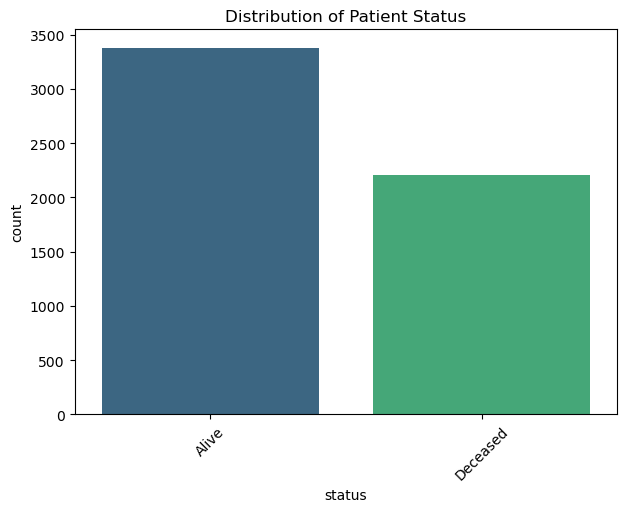

In [38]:
## Are most patients Alive or Deceased?
plt.figure(figsize=(7,5))
sns.countplot(x='status', data=gen, palette='viridis')
plt.title("Distribution of Patient Status")
plt.xticks(rotation=45)
plt.show()

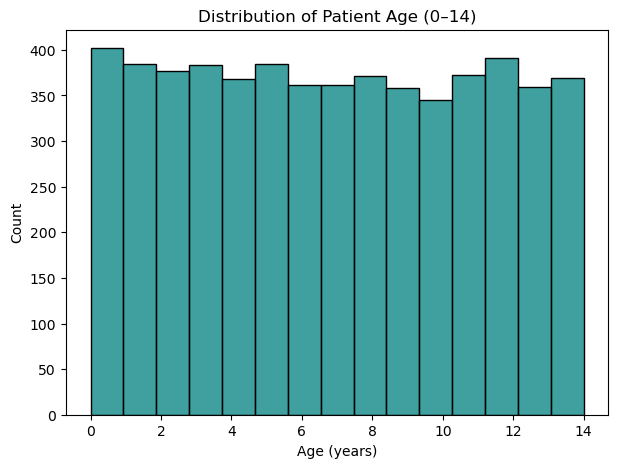

In [40]:
## who is mostly affected?
plt.figure(figsize=(7,5))
sns.histplot(gen['patient_age'], bins=15, kde=False, color='teal')
plt.title("Distribution of Patient Age (0–14)")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

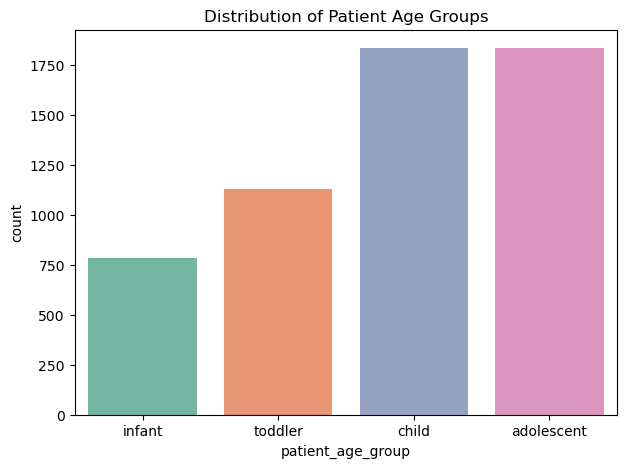

In [60]:
## Patient Age Group

plt.figure(figsize=(7,5))
sns.countplot(x='patient_age_group', data=gen, palette='Set2')
plt.title("Distribution of Patient Age Groups")
plt.show()


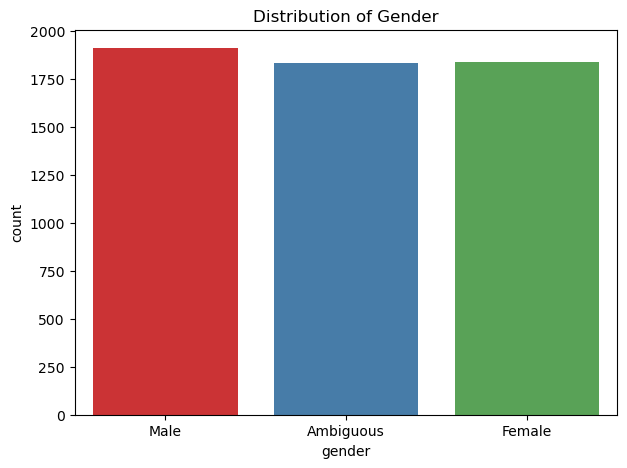

In [44]:
## Gender

plt.figure(figsize=(7,5))
sns.countplot(x='gender', data=gen, palette='Set1')
plt.title("Distribution of Gender")
plt.show()

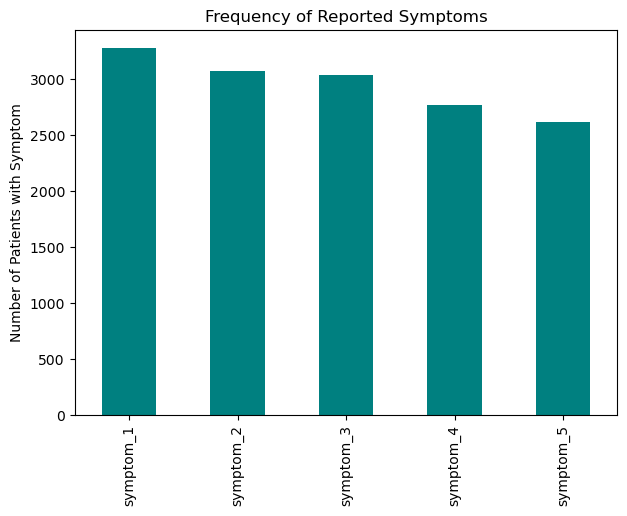

In [46]:
## Symptoms 
symptom_columns = [column for column in gen.columns if 'symptom_' in column]

gen[symptom_columns].sum().plot(kind='bar', figsize=(7,5), color='teal')
plt.title("Frequency of Reported Symptoms")
plt.ylabel("Number of Patients with Symptom")
plt.show()


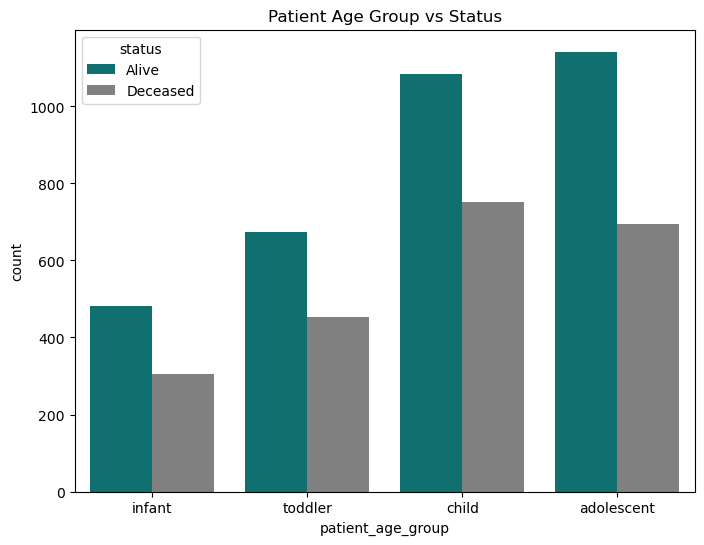

In [50]:
## Younger vs older patients – is survival different?

plt.figure(figsize=(8,6))
sns.countplot(x='patient_age_group', hue='status', data=gen, palette=['teal', "grey"])
plt.title("Patient Age Group vs Status")
plt.show()

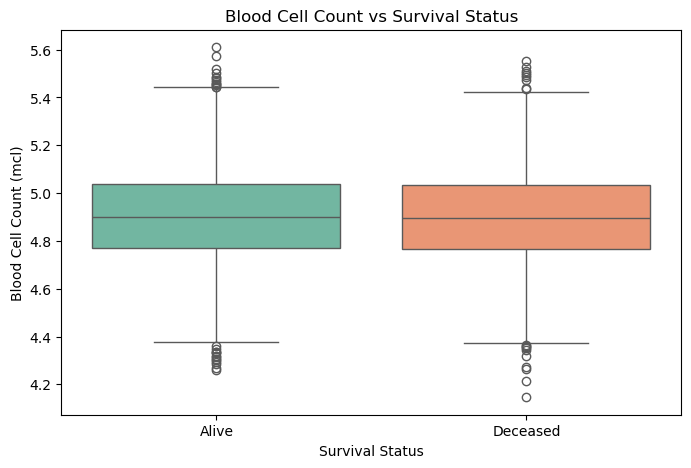

In [64]:
## Are abnormal counts linked to death?
# Blood Cell Count vs Status
plt.figure(figsize=(8,5))
sns.boxplot(x="status", y="blood_cell_count_(mcl)", data=gen, palette="Set2")
plt.title("Blood Cell Count vs Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Blood Cell Count (mcl)")
plt.show()




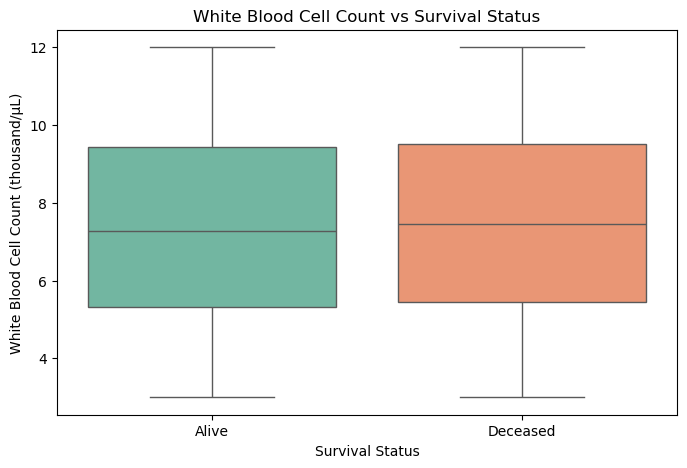

In [70]:
# Boxplot: White Blood Cell Count vs Status
plt.figure(figsize=(8,5))
sns.boxplot(x="status", y="white_blood_cell_count_(thousand_per_microliter)", data=gen, palette="Set2")
plt.title("White Blood Cell Count vs Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("White Blood Cell Count (thousand/μL)")
plt.show()

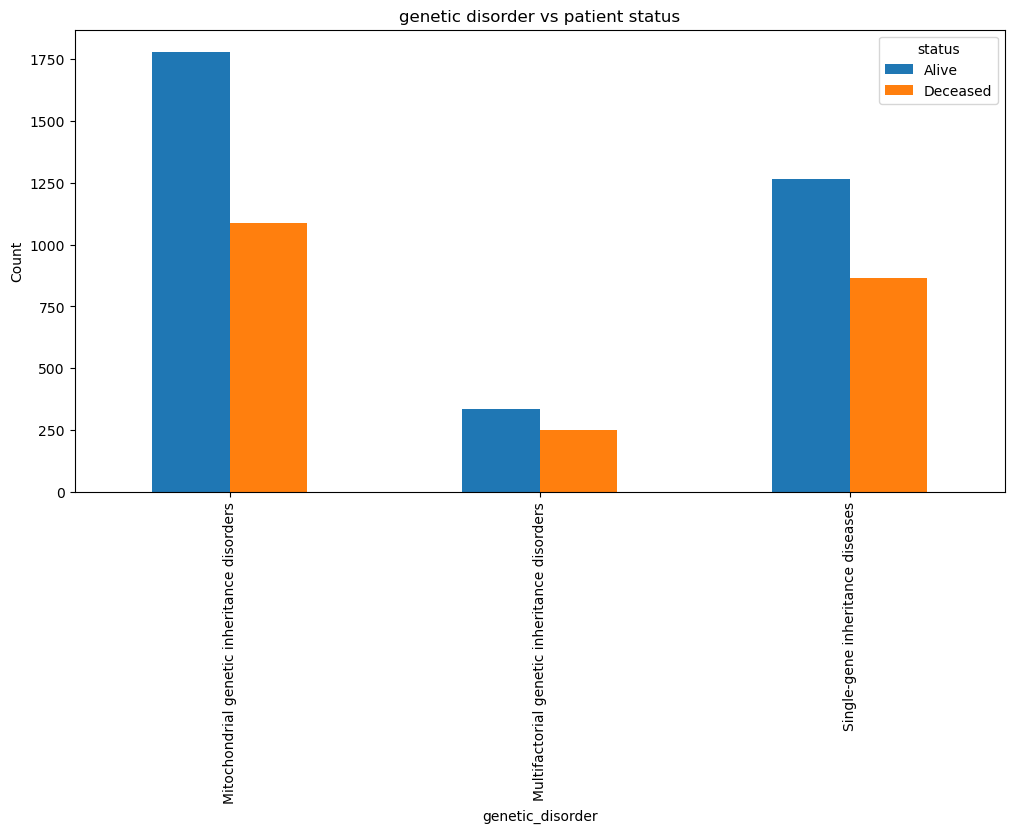

In [89]:
## Which genetic disorders are riskiest?
pd.crosstab(gen["genetic_disorder"], gen["status"]).plot(kind="bar", figsize=(12,6))
plt.title("genetic disorder vs patient status")
plt.xlabel("genetic_disorder")
plt.ylabel("Count")
plt.show()

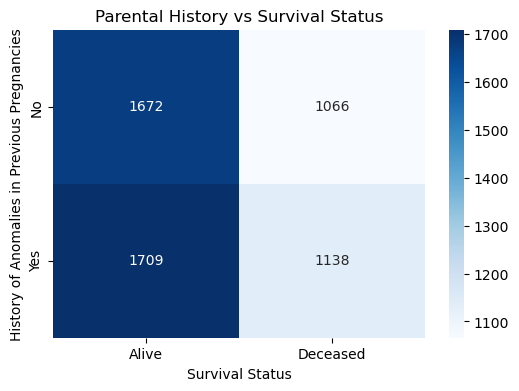

In [83]:
# Crosstab: Parental history vs Status
ct_parental = pd.crosstab(gen["history_of_anomalies_in_previous_pregnancies"], gen ["status"])

plt.figure(figsize=(6,4))
sns.heatmap(ct_parental, annot=True, fmt="d", cmap="Blues")
plt.title("Parental History vs Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("History of Anomalies in Previous Pregnancies")
plt.show()

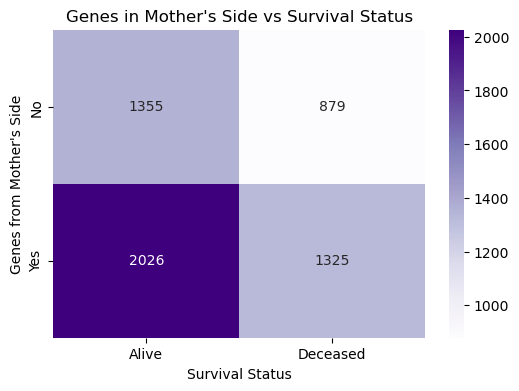

In [85]:
# Crosstab: Genes in Mother's Side vs Status
ct_mother = pd.crosstab(gen["genes_in_mother's_side"], gen["status"])

plt.figure(figsize=(6,4))
sns.heatmap(ct_mother, annot=True, fmt="d", cmap="Purples")
plt.title("Genes in Mother's Side vs Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Genes from Mother's Side")
plt.show()

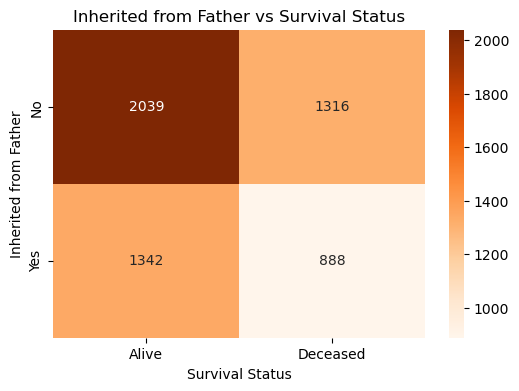

In [87]:
# Crosstab: Inherited from Father vs Status
ct_father = pd.crosstab(gen["inherited_from_father"], gen["status"])

plt.figure(figsize=(6,4))
sns.heatmap(ct_father, annot=True, fmt="d", cmap="Oranges")
plt.title("Inherited from Father vs Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Inherited from Father")
plt.show()

# DATA PREPROCESSING

In [92]:
## Deciding feature lists
target = 'status'
features = [c for c in gen.columns if c != target]

## Spliting early to avoid leakage
X = gen[features].copy()
y = gen[target].copy()

In [94]:
## Simple type detection
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['patient_age', 'blood_cell_count_(mcl)', 'test_1', 'test_2', 'test_3', 'test_4', 'test_5', 'no._of_previous_abortion', 'white_blood_cell_count_(thousand_per_microliter)', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5']
Categorical features: ["genes_in_mother's_side", 'inherited_from_father', 'maternal_gene', 'paternal_gene', 'respiratory_rate_(breaths/min)', 'heart_rate_(rates/min', 'parental_consent', 'follow_up', 'gender', 'birth_asphyxia', 'place_of_birth', 'folic_acid_details_(peri-conceptional)', 'ho_serious_maternal_illness', 'ho_radiation_exposure_(x-ray)', 'ho_substance_abuse', 'assisted_conception_ivf/art', 'history_of_anomalies_in_previous_pregnancies', 'birth_defects', 'blood_test_result', 'genetic_disorder', 'disorder_subclass', 'patient_age_group']


In [96]:
## Preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [98]:
## Using imblearn pipeline if using SMOTE
def make_model_pipeline(model, use_smote=False):
    if use_smote:
        pipe = ImbPipeline(steps=[
            ('pre', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('clf', model)
        ])
    else:
        pipe = Pipeline(steps=[
            ('pre', preprocessor),
            ('clf', model)
        ])
    return pipe

# MODEL TRAINING

In [101]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [103]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [115]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [124]:
# Encoding target variable
gen["status"] = gen["status"].map({"Alive": 0, "Deceased": 1})

# Now splitting features & target again
X = gen.drop("status", axis=1)
y = gen["status"]


In [137]:
if 'gen' in globals():
    target_col = 'status'
    if target_col not in gen.columns:
        raise ValueError("No 'status' column found. Check column names in your CSV.")

    print("Target distribution before encoding:")
    display(gen[target_col].value_counts(dropna=False))

    le_target = LabelEncoder()
    gen['target_encoded'] = le_target.fit_transform(gen[target_col].astype(str))

    exclude = [target_col, 'target_encoded']
    features = [c for c in gen.columns if c not in exclude]

    numeric_features = gen[features].select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = [c for c in features if c not in numeric_features]
    print("Numeric features:", numeric_features)
    print("Categorical features:", categorical_features[:20])

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='drop')

    X = gen[features]
    y = gen['target_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    # feature names
    def get_feature_names(preprocessor):
        num_feats = numeric_features
        cat_feats = []
        if 'cat' in preprocessor.named_transformers_:
            cat = preprocessor.named_transformers_['cat']
            if hasattr(cat.named_steps['onehot'], 'get_feature_names_out'):
                cat_feats = list(cat.named_steps['onehot'].get_feature_names_out(categorical_features))
        return num_feats + cat_feats

    feature_names = get_feature_names(preprocessor)
    print("Prepared feature count:", len(feature_names))


Target distribution before encoding:


status
0    3381
1    2204
Name: count, dtype: int64

Numeric features: ['patient_age', 'blood_cell_count_(mcl)', 'test_1', 'test_2', 'test_3', 'test_4', 'test_5', 'no._of_previous_abortion', 'white_blood_cell_count_(thousand_per_microliter)', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5']
Categorical features: ["genes_in_mother's_side", 'inherited_from_father', 'maternal_gene', 'paternal_gene', 'respiratory_rate_(breaths/min)', 'heart_rate_(rates/min', 'parental_consent', 'follow_up', 'gender', 'birth_asphyxia', 'place_of_birth', 'folic_acid_details_(peri-conceptional)', 'ho_serious_maternal_illness', 'ho_radiation_exposure_(x-ray)', 'ho_substance_abuse', 'assisted_conception_ivf/art', 'history_of_anomalies_in_previous_pregnancies', 'birth_defects', 'blood_test_result', 'genetic_disorder']
Prepared feature count: 76


=== SVM ===
Accuracy: 0.6042972247090421
Precision (weighted): 0.54607546958215
Recall (weighted): 0.6042972247090421
F1-score (weighted): 0.46381768919355115

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       676
           1       0.45      0.01      0.02       441

    accuracy                           0.60      1117
   macro avg       0.53      0.50      0.39      1117
weighted avg       0.55      0.60      0.46      1117

Confusion matrix:
[[670   6]
 [436   5]]
ROC AUC: 0.5154067544177434


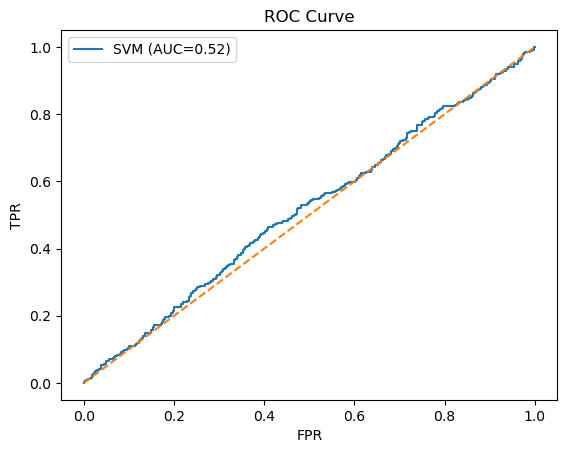

=== Random Forest ===
Accuracy: 0.5962399283795882
Precision (weighted): 0.5259665215312258
Recall (weighted): 0.5962399283795882
F1-score (weighted): 0.48205418874282135

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       676
           1       0.40      0.05      0.09       441

    accuracy                           0.60      1117
   macro avg       0.50      0.50      0.41      1117
weighted avg       0.53      0.60      0.48      1117

Confusion matrix:
[[645  31]
 [420  21]]
ROC AUC: 0.5249768546471842


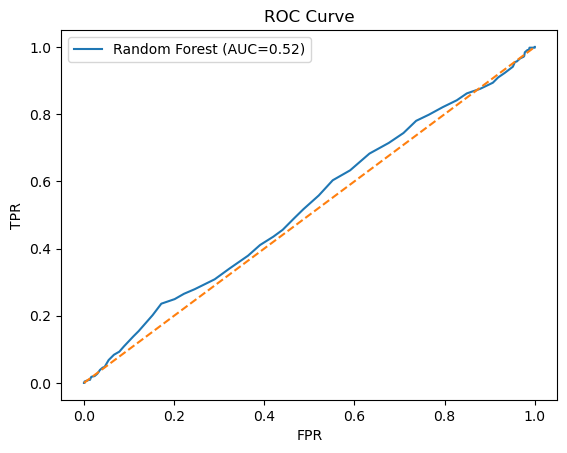

=== Decision Tree ===
Accuracy: 0.5174574753804835
Precision (weighted): 0.5184062305685051
Recall (weighted): 0.5174574753804835
F1-score (weighted): 0.5179219288557937

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       676
           1       0.39      0.39      0.39       441

    accuracy                           0.52      1117
   macro avg       0.50      0.50      0.50      1117
weighted avg       0.52      0.52      0.52      1117

Confusion matrix:
[[404 272]
 [267 174]]
ROC AUC: 0.4960954796119631


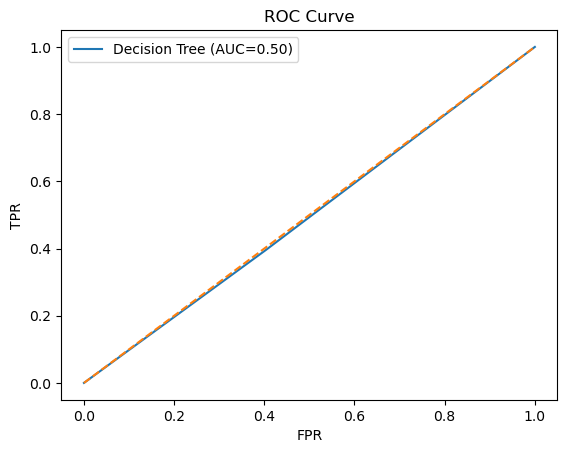

SVM CV f1-weighted mean: 0.4670 std: 0.0037
RandomForest CV f1-weighted mean: 0.4830 std: 0.0107
DecisionTree CV f1-weighted mean: 0.5151 std: 0.0215


In [139]:
if 'gen' in globals():
    # Helper evaluate function
    def evaluate_model(clf, X_test, y_test, model_name="model"):
        y_pred = clf.predict(X_test)
        y_proba = None
        if hasattr(clf, "predict_proba"):
            y_proba = clf.predict_proba(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"=== {model_name} ===")
        print("Accuracy:", acc)
        print("Precision (weighted):", prec)
        print("Recall (weighted):", rec)
        print("F1-score (weighted):", f1)
        print("\nClassification report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("Confusion matrix:")
        print(confusion_matrix(y_test, y_pred))
        # ROC AUC for binary if available
        if y_proba is not None and y_proba.shape[1] == 2:
            try:
                auc = roc_auc_score(y_test, y_proba[:,1])
                print("ROC AUC:", auc)
                fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
                plt.figure()
                plt.plot(fpr, tpr, label=f'{model_name} (AUC={auc:.2f})')
                plt.plot([0,1], [0,1], '--')
                plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend(); plt.show()
            except Exception as e:
                print("ROC AUC couldn't be computed:", e)
        return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

    svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
    rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
    dt_clf = DecisionTreeClassifier(random_state=42)

    svm_clf.fit(X_train_prep, y_train)
    rf_clf.fit(X_train_prep, y_train)
    dt_clf.fit(X_train_prep, y_train)

    svm_results = evaluate_model(svm_clf, X_test_prep, y_test, "SVM")
    rf_results = evaluate_model(rf_clf, X_test_prep, y_test, "Random Forest")
    dt_results = evaluate_model(dt_clf, X_test_prep, y_test, "Decision Tree")

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for name, model in [("SVM", svm_clf), ("RandomForest", rf_clf), ("DecisionTree", dt_clf)]:
        cv_scores = cross_val_score(model, preprocessor.transform(X), y, cv=skf, scoring='f1_weighted')
        print(f"{name} CV f1-weighted mean: {cv_scores.mean():.4f} std: {cv_scores.std():.4f}")
